In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance



In [3]:
def gini_impurity(column):
    impurity = 1
    counters = Counter(column)
    for value in column.unique():
        impurity -= (counters[value] / len(column)) ** 2

    return impurity

In [54]:
data = pd.read_csv('features.csv')
#usecols=['churn_yn','longest_time_between_events', 'event_num', 'enterworld_num', 'levelup_num', 'spendmoney_num', 'itemupgrade_successrate', 'sessions_num'])
data = data.dropna()
data = data.drop(['enterworld_num','buyitemnowmainauction_num','completechallengeweek_num'],axis=1)
data = data.drop(['actor_account_id','survival_time'],axis=1)
data = data.drop(columns=data.columns[0],axis=1)
X = data.copy()
y = X.pop('churn_yn')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [55]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(995, 33) (995,)
(2985, 33) (2985,)


In [56]:
clf = DecisionTreeClassifier(criterion='gini', 
    splitter='best', 
    max_depth=4, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=20, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


In [57]:
#F1-score
print("F1 Score")
print('f1 ' , f1_score(y_test, predictions))
#Cross validation
scores = cross_val_score(clf, X, y, cv=5)
print("CrossValidation Scores: ")
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

F1 Score
f1  0.5805243445692885
CrossValidation Scores: 
[0.78768844 0.7361809  0.76130653 0.75       0.74748744]
0.76 accuracy with a standard deviation of 0.02


[Text(0.5, 0.9, 'X[1] <= 49.5\ngini = 0.419\nsamples = 2985\nvalue = [2093, 892]'),
 Text(0.25, 0.7, 'X[17] <= 533804.469\ngini = 0.47\nsamples = 746\nvalue = [282, 464]'),
 Text(0.125, 0.5, 'X[29] <= 1894.085\ngini = 0.396\nsamples = 356\nvalue = [97, 259]'),
 Text(0.0625, 0.3, 'X[2] <= 0.5\ngini = 0.287\nsamples = 115\nvalue = [20, 95]'),
 Text(0.03125, 0.1, 'gini = 0.231\nsamples = 90\nvalue = [12, 78]'),
 Text(0.09375, 0.1, 'gini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Text(0.1875, 0.3, 'X[25] <= 141319.0\ngini = 0.435\nsamples = 241\nvalue = [77, 164]'),
 Text(0.15625, 0.1, 'gini = 0.422\nsamples = 231\nvalue = [70, 161]'),
 Text(0.21875, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.375, 0.5, 'X[4] <= 16.5\ngini = 0.499\nsamples = 390\nvalue = [185, 205]'),
 Text(0.3125, 0.3, 'X[0] <= 509.0\ngini = 0.414\nsamples = 89\nvalue = [26, 63]'),
 Text(0.28125, 0.1, 'gini = 0.493\nsamples = 43\nvalue = [19, 24]'),
 Text(0.34375, 0.1, 'gini = 0.258\nsamples = 46\nvalue = [

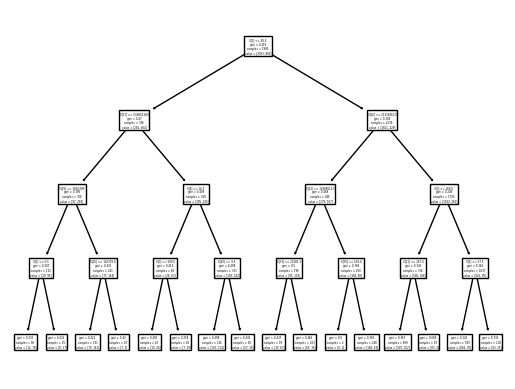

In [33]:
tree.plot_tree(clf)

In [58]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [59]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

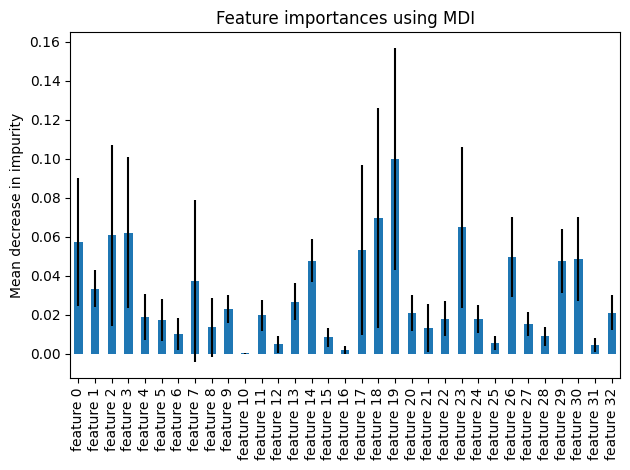

In [60]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [62]:
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

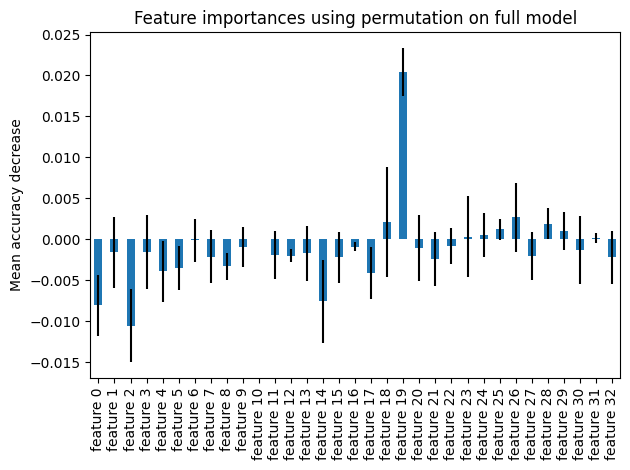

In [63]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()